In [1]:
# import traci
#
# SUMO_BINARY = r"C:\Program Files (x86)\Eclipse\Sumo\bin\sumo-gui"
# CONFIG_FILE = r"C:\Program Files (x86)\Eclipse\Sumo\doc\tutorial\quickstart\data\quickstart.sumocfg"
# # CONFIG_FILE = r"C:\Repos\rl_traffic_signal_optimization\models\20230718_sumo_ma\osm.sumocfg"

In [3]:
# sumo_cmd = [SUMO_BINARY, "-c", CONFIG_FILE, "--start", "--quit-on-end", "--tripinfo-output", tripinfo_file_name]
#
# traci.start(sumo_cmd)
#
# while traci.simulation.getMinExpectedNumber() > 0:
#     traci.simulationStep()

In [4]:
# traci.close()

In [80]:
from datetime import datetime
str(datetime.now().strftime("%Y%m%d%H%M%S"))

'20231129220849'

In [46]:
NAME = "diff-waiting-time100"

tripinfo_file = "tripinfo.xml"
# tripinfo_file = NAME + "-tripinfo.xml"
vehicle_file = NAME + "-controlled-vehicles.csv"

In [70]:
import pandas as pd

# vehicles = pd.read_csv(vehicle_file)
vehicles = pd.DataFrame(["veh30", "veh33", "veh3"], columns=["controlled_vehicles"])

In [71]:
from lxml import etree

root = etree.parse(tripinfo_file).getroot()
data = {"vehicle": [], "travel_time": [], "waiting_time": []}

for t in root.iter("tripinfo"):
    data["vehicle"].append(t.get("id"))
    data["travel_time"].append(int(float((t.get("duration")))))
    data["waiting_time"].append(int(float(t.get("waitingTime"))))

tripinfo = pd.DataFrame(data)

In [75]:
all_vehicles = tripinfo.merge(vehicles, left_on="vehicle", right_on="controlled_vehicles", how="left")
all_vehicles["controlled_vehicles"] = ~all_vehicles["controlled_vehicles"].isna()
only_controlled = all_vehicles[all_vehicles["controlled_vehicles"]].drop("controlled_vehicles", axis=1)
all_vehicles = all_vehicles.drop("controlled_vehicles", axis=1)

In [61]:
import seaborn as sns

# sns.histplot(all_vehicles)

<Axes: ylabel='Count'>

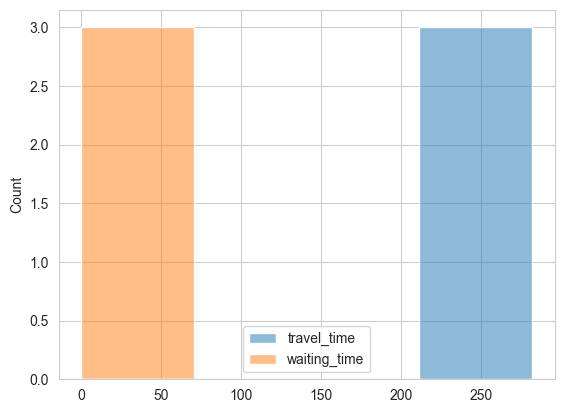

In [77]:
sns.histplot(only_controlled)

In [69]:
name = "baseline" # diff-waiting-time100

In [70]:
vehicle_info = pd.read_csv(f"src/experiments/{name}-vehicle-times.csv")
vehicle_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13885 entries, 0 to 13884
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vehicle_id             13885 non-null  object 
 1   depart_time            13885 non-null  int64  
 2   arrive_time            10897 non-null  float64
 3   waiting_time           13885 non-null  float64
 4   is_controlled_vehicle  13885 non-null  bool   
 5   is_teleported_vehicle  13885 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(1)
memory usage: 461.2+ KB


In [71]:
vehicle_info

,vehicle_id,depart_time,arrive_time,waiting_time,is_controlled_vehicle,is_teleported_vehicle
0,veh14400,25201,25732.0,22.0,False,False
1,truck3600,25201,25559.0,0.0,False,False
2,bike3015,25201,25901.0,31.0,False,False
3,moto200,25201,25561.0,1.0,False,False
4,veh14401,25202,25905.0,4.0,True,False
...,...,...,...,...,...,...
13880,veh23395,34196,NaN,0.0,False,False
13881,veh20272,34197,NaN,0.0,False,False
13882,truck6599,34198,NaN,0.0,False,False
13883,veh22233,34199,NaN,0.0,False,False


In [72]:
len(vehicle_info[vehicle_info["is_teleported_vehicle"]])

965

C:\Users\KarstenK\AppData\Local\Temp\ipykernel_16524\467360186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_trips["Travel Time"] = complete_trips["arrive_time"] - complete_trips["depart_time"]


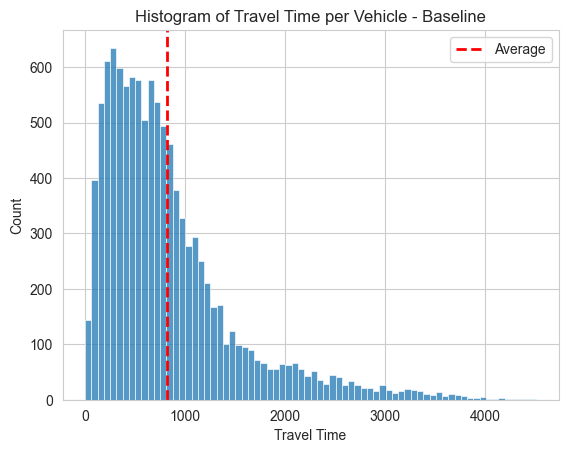

In [85]:
import matplotlib.pyplot as plt

complete_trips = vehicle_info.dropna(subset=["depart_time", "arrive_time"])
complete_trips["Travel Time"] = complete_trips["arrive_time"] - complete_trips["depart_time"]
sns.histplot(complete_trips, x="Travel Time")
plt.title("Histogram of Travel Time per Vehicle - Baseline")
plt.axvline(complete_trips["Travel Time"].mean(), color='red', linestyle='dashed', linewidth=2, label='Average')
plt.legend()
plt.savefig("baseline-hist.png")

Average waiting time per controlled lane: 1554.1444444444444 seconds


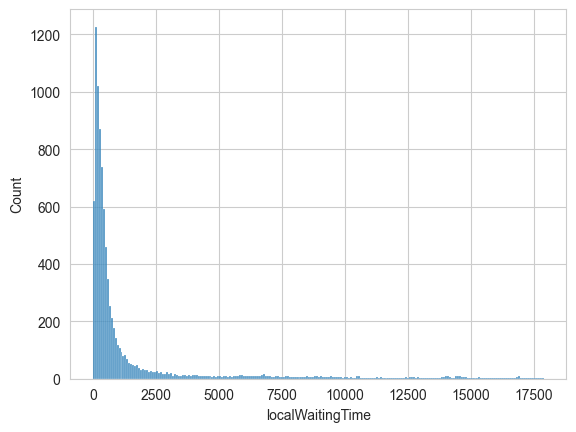

In [74]:
df = pd.read_csv(f"src/experiments/{name}-eval-df.csv") # each row is one timestep during simulation
sns.histplot(df, x="localWaitingTime")
print("Average waiting time per controlled lane: " + str(df['localWaitingTime'].mean()) + " seconds")